In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Loading the data from csv into a pandas dataframe

In [2]:
diabetes =pd.read_csv('diabetes.csv')

In [3]:
#get the first element 
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Features selections we need to get the feature( independent variable) and target(dependent variable)

In [4]:
featuresCols =['Pregnancies','Glucose','Insulin','Age','BMI','BloodPressure','DiabetesPedigreeFunction']

In [5]:
target=diabetes.Outcome

In [6]:
x=diabetes[featuresCols]
y=diabetes.Outcome

# Splitting Data

In [7]:
# we meed to split the data into training set and test set
# we do 70 % training and 30 % test 
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Building Decision Tree Model


### Let build the model using scikit learn

In [8]:
# we create an object decision tree
decisionTree =DecisionTreeClassifier()

In [9]:
# We train the decision tree classifier
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
# we predict the response for the test
y_predict=decisionTree.predict(X_test)

# Evaluation the decision tree classifier

In [11]:
# Accuracy is calculted by using the test score by comparing the test values and predicted 
print("Accuracy",metrics.accuracy_score(y_test,y_predict))

Accuracy 0.6753246753246753


#### we find that the accuracy of the decison tree classifier is 69.26 %

# vusializing decision trees 

In [12]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus



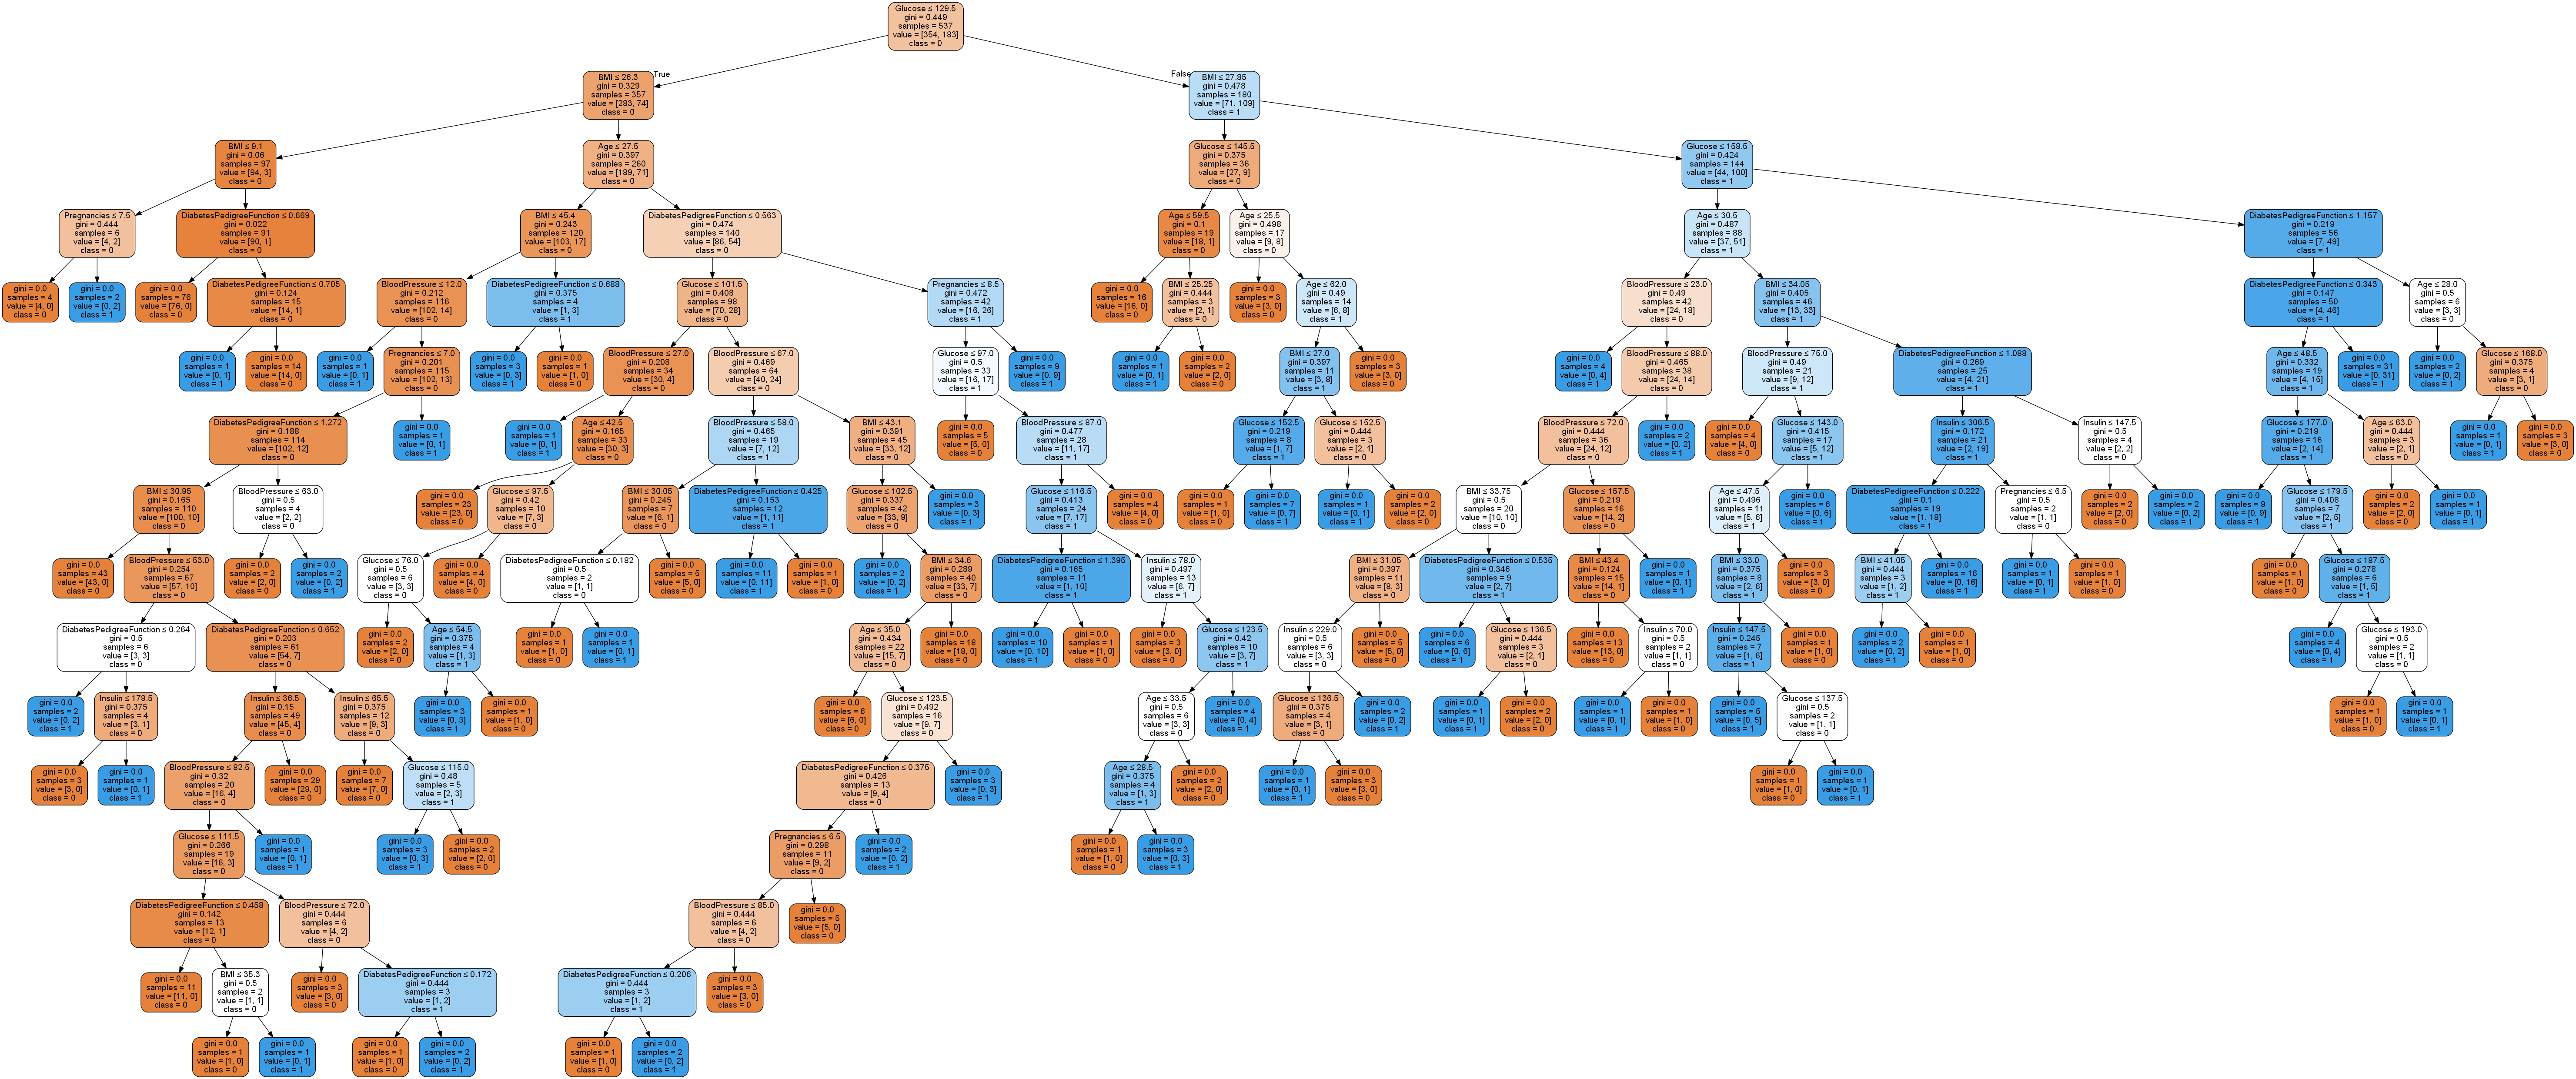

In [13]:
dot_data = StringIO()
export_graphviz(decisionTree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = featuresCols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

# Optimizing Decision tree classifier

In [14]:
# create decision tree classifier
decisionOptimize =DecisionTreeClassifier(criterion="entropy",max_depth=3)


In [15]:
# Train decision tree classifier
decisionOptimize.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
# predict the response for the dataset
y_preditOpt=decisionOptimize.predict(X_test)

In [17]:
# Measure de accuracy
print("Accurcy :",metrics.accuracy_score(y_test,y_preditOpt))

Accurcy : 0.7705627705627706


## The accuracy has improve to 77.05%

# Visualizing the tree

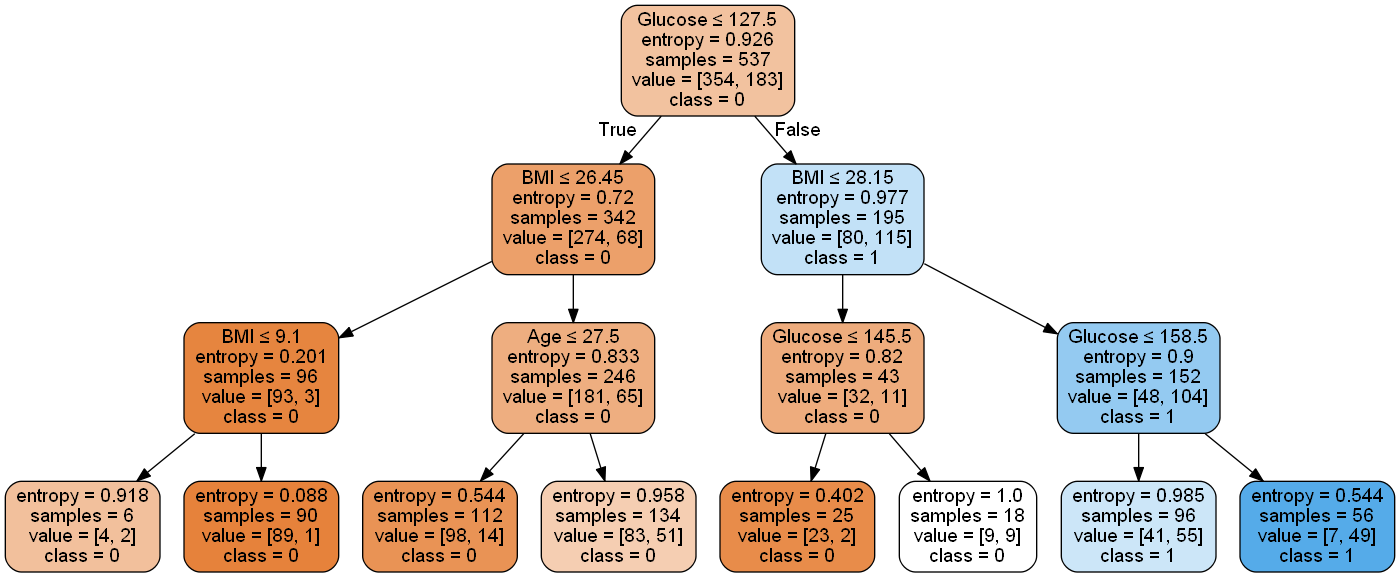

In [19]:
dot_data = StringIO()
export_graphviz(decisionOptimize, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = featuresCols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [23]:
# create another decision tree classifier with depth equal to 4
decision4 =DecisionTreeClassifier(criterion="entropy",max_depth=2)

In [24]:
# train the decison tree model classifier
decision4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
# predict the response for the test set
yPredit=decision4.predict(X_test)

In [28]:
# Measure the accuracy
print("Accuracy:",metrics.accuracy_score(y_test,yPredit))

Accuracy: 0.7705627705627706


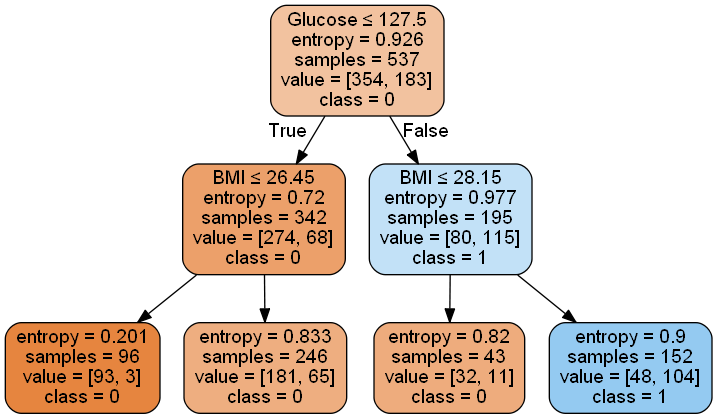

In [30]:
dot_data = StringIO()
export_graphviz(decision4, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = featuresCols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())